# GSSR
Gene Splice Site Recognition by WAM, Bayesian Network and SVM approaches

## Abstract
xxx

## Introduction

### Gene splice site

### Models

### Scipy and Pgmpy

## Material and Method

### Environment

In [1]:
import warnings
import import_ipynb
import numpy as np
import pandas as pd
import networkx as nx
from Utils import load_data
from Models import WAM, BN, SVM
from Evaluator import Evaluator
from matplotlib import pyplot as plt
from IPython.display import display, Markdown

warnings.filterwarnings("ignore")

importing Jupyter notebook from Utils.ipynb
importing Jupyter notebook from Models.ipynb
importing Jupyter notebook from Evaluator.ipynb


### Data curation

### Encoding for features

When encoding the sequence features to be numeric, a One-hot encoder were used. And to make the problem simpler, the ambiguous bases in sequences were disgarded. A simple example is that when deeling with sequence A, which can be represented as $acgtay^* aaccggttr^* y^* $, the ambiguous bases $y^*$ and $r^*$ are simply disgarded. So the sequence A becomes $acgtaaaccggtt$. And next, a One-hot encoder are used to encode sequence A to a numeric feature vector, which can be represented as $[1,0,0,0...0,0,0,1]$. In all of my experiments, I used 10 bases before and after the site to be tested, including its own sequence with a total length of 21.

### Model implements

I implemented 3 models mainly using Python. Besides, the Bayesian network model and Support vector machine were implemented based on Pgmpy and Scikit-learn pacakge. The 3 models are designed to be *[put into practical use]* as much as possible. They contain several very easy-to-use program interfaces: `fit`, `predict_probas`, `predict_scores` and `predict_classes`. For all 3 models, the `fit` method are used for training, and the other 3 `predict` methods are used for prediction. The `predict_probas` are used for predicting the probabilities each sample belonging to each class, the `predict_scores` are used for calculating the $S(X)$, and the `predict_classes` are used for predicting the classes each sample belongs, this is simply done by comparing the $S(X)$ and given threshold $T$. Most importantly, the $S(X)$ are calculated by:
<div align='center'> $S(X) = ln(\frac{P^+ (X)}{P^- {X}})$ </div>

#### Stratagies for BN to learn structures and parameters from data

I used the min max hill climb (MMHC) algorithm *[REF]* to learn BN structures from the training data. MMHC algorithm is a constrained-based learning algorithm, firstly be proposed by *[AUTHOR]*. *[ details of MMHC algorithm]*

#### Stratagies for SVM to learn hyperplane

In [2]:
class Model:
    
    def __init__(self):
        self.wam = WAM()
        self.bn = BN()
        self.svm = SVM(kernel='rbf', gamma='scale', random_state=1, probability=True, verbose=True)
        
model = Model()

### Evaluation

## Result and Discussion

### Weights for WAM

In [3]:
model.wam.fit(pd.Series(['ACCGGCCGGAATGTTCCGGAT', 'ACCGGCCGGATTGTTCCGGTT',
                         'CCCGGCCGGAATGTTCCGGAT', 'GGCGGCCGGATTGTTCCGGTT']),
          pd.Series([1, 1, 0, 0]))
pd.set_option('display.max_columns', None)
p_rename = lambda x: 'P.{}'.format(x)
n_rename = lambda x: 'N.{}'.format(x)

display(Markdown( '<h3 align="center">Weights for Weighted array model (Positive / Negative)</h3>' ))
model.wam.positive_weights.applymap(lambda x: '%.3f'%x) + '/' + \
model.wam.negative_weights.applymap(lambda x: '%.3f'%x)

<h3 align="center">Weights for Weighted array model (Positive / Negative)</h3>

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT
0,nan/nan,nan/nan,nan/nan,nan/nan,nan/nan,nan/nan,nan/nan,nan/nan,nan/nan,nan/nan,nan/nan,nan/nan,nan/nan,nan/nan,nan/nan,nan/nan
1,nan/nan,nan/nan,nan/nan,nan/nan,nan/nan,nan/nan,nan/nan,nan/nan,nan/nan,nan/nan,nan/nan,nan/nan,nan/nan,nan/nan,nan/nan,nan/nan
2,0.048/0.048,0.217/0.053,0.053/0.053,0.043/0.043,0.053/0.053,0.032/0.103,0.032/0.032,0.053/0.053,0.040/0.040,0.043/0.040,0.032/0.091,0.040/0.040,0.053/0.053,0.043/0.043,0.043/0.043,0.040/0.040
3,0.048/0.048,0.043/0.053,0.053/0.053,0.043/0.043,0.053/0.053,0.161/0.034,0.032/0.032,0.053/0.053,0.040/0.040,0.043/0.120,0.032/0.030,0.040/0.040,0.053/0.053,0.043/0.043,0.043/0.043,0.040/0.040
4,0.048/0.048,0.043/0.053,0.053/0.053,0.043/0.043,0.053/0.053,0.032/0.034,0.161/0.161,0.053/0.053,0.040/0.040,0.043/0.040,0.032/0.030,0.040/0.040,0.053/0.053,0.043/0.043,0.043/0.043,0.040/0.040
5,0.048/0.048,0.043/0.053,0.053/0.053,0.043/0.043,0.053/0.053,0.032/0.034,0.032/0.032,0.053/0.053,0.040/0.040,0.043/0.040,0.161/0.152,0.040/0.040,0.053/0.053,0.043/0.043,0.043/0.043,0.040/0.040
6,0.048/0.048,0.043/0.053,0.053/0.053,0.043/0.043,0.053/0.053,0.032/0.034,0.032/0.032,0.053/0.053,0.040/0.040,0.217/0.200,0.032/0.030,0.040/0.040,0.053/0.053,0.043/0.043,0.043/0.043,0.040/0.040
7,0.048/0.048,0.043/0.053,0.053/0.053,0.043/0.043,0.053/0.053,0.161/0.172,0.032/0.032,0.053/0.053,0.040/0.040,0.043/0.040,0.032/0.030,0.040/0.040,0.053/0.053,0.043/0.043,0.043/0.043,0.040/0.040
8,0.048/0.048,0.043/0.053,0.053/0.053,0.043/0.043,0.053/0.053,0.032/0.034,0.161/0.161,0.053/0.053,0.040/0.040,0.043/0.040,0.032/0.030,0.040/0.040,0.053/0.053,0.043/0.043,0.043/0.043,0.040/0.040
9,0.048/0.048,0.043/0.053,0.053/0.053,0.043/0.043,0.053/0.053,0.032/0.034,0.032/0.032,0.053/0.053,0.040/0.040,0.043/0.040,0.161/0.152,0.040/0.040,0.053/0.053,0.043/0.043,0.043/0.043,0.040/0.040


### Graph for BN

In [4]:
data = np.random.randint(0, 2, size=(50, 10))
label = (data.sum(axis=1) > np.mean(data.sum(axis=1))).astype(int)
test_data = np.random.randint(0, 2, size=(50, 10))
model.bn.fit(data, label=label, sign_level=0.01)

Performing structure learning, using estimator: `<class 'pgmpy.estimators.MmhcEstimator.MmhcEstimator'>`
Done !
Performing parameter learning, using estimator: `<class 'pgmpy.estimators.BayesianEstimator.BayesianEstimator'>`


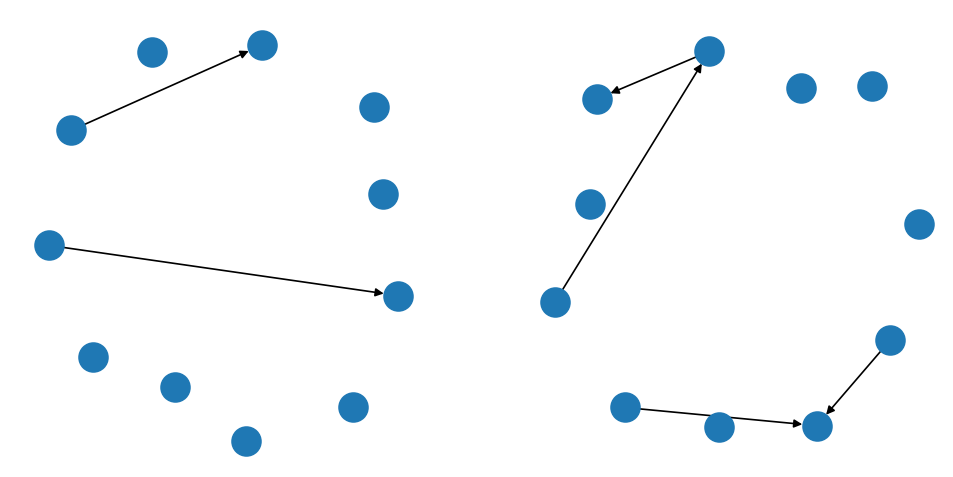

In [5]:
plt.figure(figsize=(10,5), dpi=120)
ax1 = plt.subplot(121)
nx.draw(model.bn.networks['positive'])
ax1 = plt.subplot(122)
nx.draw(model.bn.networks['negative'])

### Graph for SVM

In [ ]:
data = np.random.randint(0, 2, size=(50, 10))
label = (data.sum(axis=1) > np.mean(data.sum(axis=1))).astype(int)
test_data = np.random.randint(0, 2, size=(50, 10))

print(label)
model.svm.fit(data, label)
model.svm.predict_probas(data).shape
#model.svm.predict_scores(test_data)
# plot

### Performance
- Table
- ROC Sn-Sp Curves

In [10]:
evaltr = Evaluator(labels=np.random.randint(0, 2, size=(100)), 
                  wam_scores=np.random.randint(0,10, size=(100)), 
                  bn_scores=np.random.randint(0,10, size=(100)), 
                  svm_scores=np.random.randint(0,10, size=(100)))

display(evaltr.Cal_Sn_Sp(evaltr.Confusion_table(T_range=np.arange(0, 10, 0.1))['wam_scores']).round(2).T)
display(evaltr.Cal_Tpr_Fpr(evaltr.Confusion_table(T_range=np.arange(0, 10, 0.1))['wam_scores']).round(2).T)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Threshold,0.00,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,...,9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9
Sensitivity,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Specificity,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Threshold,0.00,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,...,9.0,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9
Tpr,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fpr,0.89,0.89,0.89,0.89,0.89,0.89,0.89,0.89,0.89,0.89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


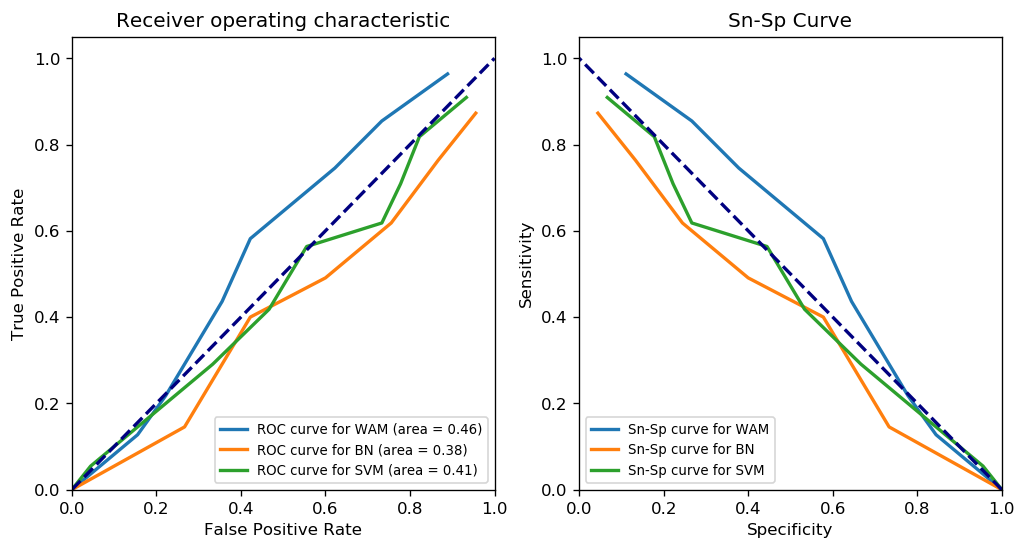

In [11]:
plt.figure(figsize=(10,5), dpi=120)
ax1 = plt.subplot(121)
evaltr.ROC_Curves(T_range=np.arange(0, 10, 0.1))
ax1 = plt.subplot(122)
evaltr.Sn_Sp_Curves(T_range=np.arange(0, 10, 0.1))

### Discussion